# Exploratory Data Analysis
Maestría en Inteligencia Artificial Aplicada

Abraham Rincón Treviño  A00819677

Erick de Jesus Hernández Cerecedo A01066428

México, 28 de enero de 2024

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'TruckLogs.csv'

# Lee el archivo CSV en un DataFrame de pandas
df = pd.read_csv(archivo_csv)


C:\Users\arincon\AppData\Local\Temp\ipykernel_24884\2125389602.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo_csv)


In [4]:
print(df.head())

   IdTruck TruckNumber  Latitude  Longitude                  ApiDate  \
0  3127333          01   25.8704  -100.2552  2024-01-15 00:02:40.823   
1  3127334        1024   27.4659   -99.5763  2024-01-15 00:02:40.863   
2  3127335        1025   27.4661   -99.5769  2024-01-15 00:02:40.823   
3  3127336        1026   27.5941   -99.5424  2024-01-15 00:02:40.790   
4  3127337        1027   27.4657   -99.5767  2024-01-15 00:02:40.823   

   StatusTime Direction  Bearing  Speed GeoTab_Id  ...  OtherCity PostalCode  \
0         NaN       NaN       -1    0.0       b74  ...        NaN    65516.0   
1         NaN         N        0    0.0       bE5  ...        NaN    88283.0   
2         NaN        SW      256    0.0       bE6  ...        NaN    88283.0   
3         NaN        NE       21    0.0       bE7  ...        NaN    88176.0   
4         NaN       NaN       -1    0.0       bC6  ...        NaN    88283.0   

   Region                                 Street  \
0    N.L.                         

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531899 entries, 0 to 531898
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IdTruck           531899 non-null  int64  
 1   TruckNumber       531899 non-null  object 
 2   Latitude          531899 non-null  float64
 3   Longitude         531899 non-null  float64
 4   ApiDate           531899 non-null  object 
 5   StatusTime        0 non-null       float64
 6   Direction         426764 non-null  object 
 7   Bearing           531899 non-null  int64  
 8   Speed             531899 non-null  float64
 9   GeoTab_Id         531899 non-null  object 
 10  IsDriving         531899 non-null  int64  
 11  Country           531899 non-null  object 
 12  Ignition          531899 non-null  int64  
 13  Odometer          531899 non-null  float64
 14  SerialNumber      531899 non-null  object 
 15  City              448920 non-null  object 
 16  FormattedAddress  53

In [6]:

# 1. Valores faltantes y patrones de ausencia
# Muestra el total de valores faltantes por columna
print("1. Valores faltantes:")
print(df.isnull().sum())


1. Valores faltantes:
IdTruck                  0
TruckNumber              0
Latitude                 0
Longitude                0
ApiDate                  0
StatusTime          531899
Direction           105135
Bearing                  0
Speed                    0
GeoTab_Id                0
IsDriving                0
Country                  0
Ignition                 0
Odometer                 0
SerialNumber             0
City                 82979
FormattedAddress         0
OtherCity           531899
PostalCode           17689
Region                   1
Street               72764
StreetName           72764
StreetNumber        227777
PanicFinishDate     531899
Carrier             531899
ApiUTCDate               0
Mileage                  0
dtype: int64


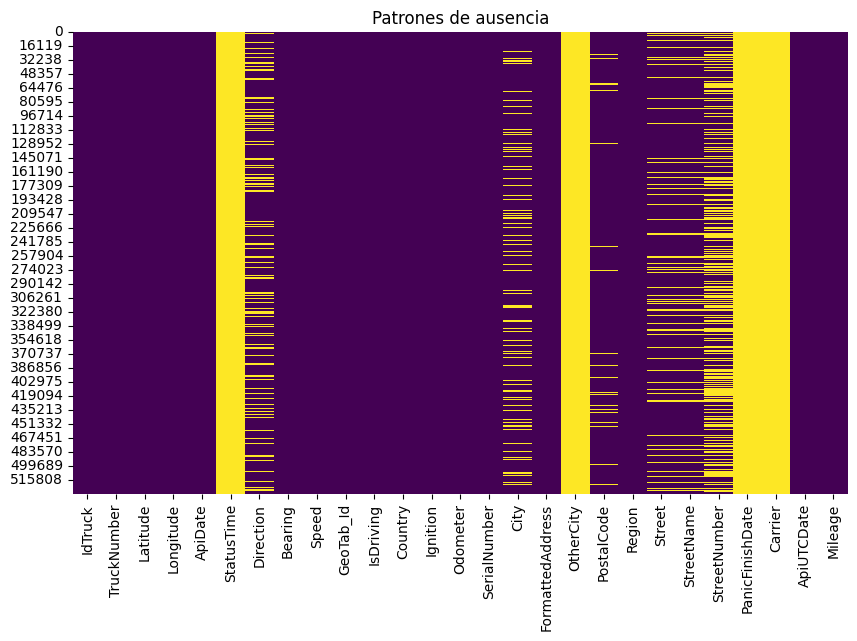

In [9]:
# Visualiza patrones de ausencia
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Patrones de ausencia')
plt.show()

In [10]:
# 1. Valores faltantes y valores únicos de las columnas con datos faltantes
# Muestra el total de valores faltantes por columna
missing_values = df.isnull().sum()

# Filtra las columnas con valores faltantes
columns_with_missing_values = missing_values[missing_values > 0].index

# Muestra los valores únicos de las columnas con datos faltantes
print("1. Valores únicos de las columnas con datos faltantes:")
for column in columns_with_missing_values:
    unique_values = df[column].unique()
    print(f"\nColumna: {column}\nValores únicos: {unique_values}")



1. Valores únicos de las columnas con datos faltantes:

Columna: StatusTime
Valores únicos: [nan]

Columna: Direction
Valores únicos: [nan 'N' 'SW' 'NE' 'SE' 'NW' 'NSE' 'NSW']

Columna: City
Valores únicos: ['Entronque Laredo-Salinas Victoria' 'Nuevo Laredo' nan ...
 'Fraccionamiento Cosmópolis Octavo Sector' 'El Batallón de los Montoya'
 'Culiacán Rosales']

Columna: OtherCity
Valores únicos: [nan]

Columna: PostalCode
Valores únicos: [65516.0 88283.0 88176.0 ... 80966.0 80332.0 80300.0]

Columna: Region
Valores únicos: ['N.L.' 'Tamps.' 'TX' 'Qro.' 'S.L.P.' 'Méx.' 'Gto.' 'Coah.' 'Jal.' 'Camp.'
 'CDMX' 'Yuc.' 'Hgo.' 'Tlax.' 'Zac.' 'Pue.' 'Ver.' 'Ags.' 'Tab.' nan
 'Chis.' 'Mor.' 'Mich.' 'GTO' 'B.C.' 'Dgo.' 'Sin.' 'Son.']

Columna: Street
Valores únicos: [nan '3913 Francisco Echegaray' 'Puente Internacional Comercio Mundial'
 ... '369 Camacho' '826 Manila' '125 C. Barcelona']

Columna: StreetName
Valores únicos: [nan 'Francisco Echegaray' 'Puente Internacional Comercio Mundial' ...
 'C. 

In [11]:
# 2. Estadísticas resumidas
print("\n2. Estadísticas resumidas:")
print(df.describe())


2. Estadísticas resumidas:
            IdTruck       Latitude      Longitude  StatusTime        Bearing  \
count  5.318990e+05  531899.000000  531899.000000         0.0  531899.000000   
mean   3.395014e+06      25.090036     -99.990157         NaN     135.483103   
std    1.544480e+05       2.814180       0.939178         NaN     118.741999   
min    3.127333e+06      17.670700    -109.913900         NaN      -1.000000   
25%    3.261264e+06      22.935350    -100.289800         NaN       0.000000   
50%    3.395012e+06      25.886800     -99.872800         NaN     132.000000   
75%    3.528766e+06      27.465900     -99.576800         NaN     243.000000   
max    3.662531e+06      28.616400     -89.674400         NaN     359.000000   

               Speed      IsDriving       Ignition      Odometer  OtherCity  \
count  531899.000000  531899.000000  531899.000000  5.318990e+05        0.0   
mean       11.844196       0.260636       0.431458  1.820462e+05        NaN   
std        22.

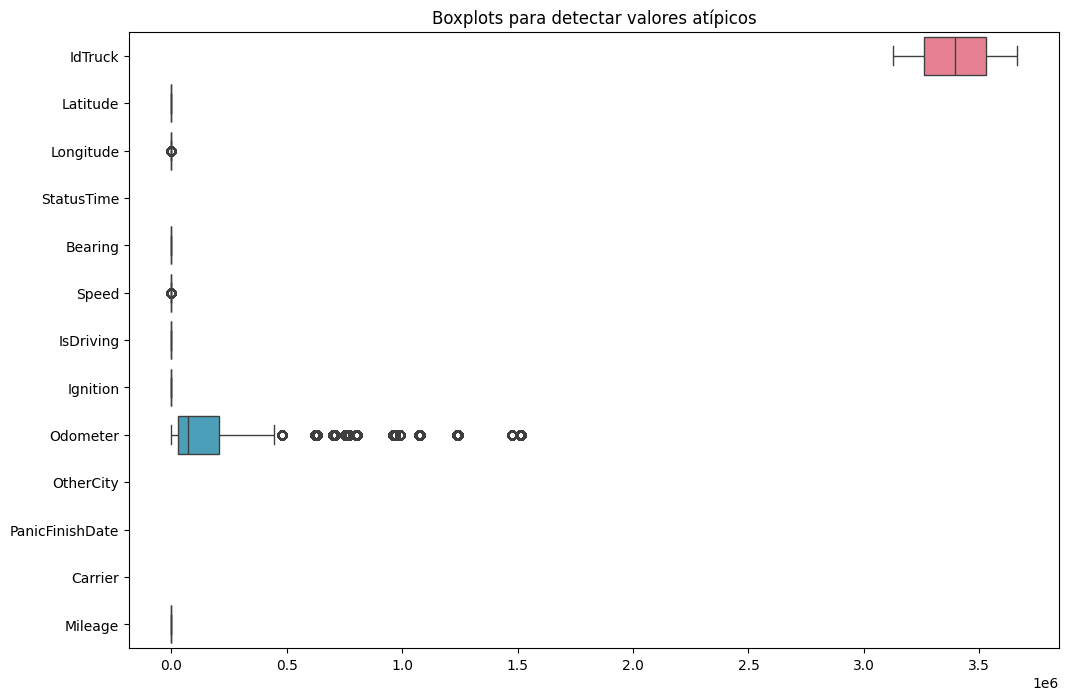

In [12]:
# 3. Valores atípicos
# Visualización de boxplots para detectar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplots para detectar valores atípicos')
plt.show()

In [13]:
# 4.Cardinalidad de variables categoricas
print("\n4. Cardinalidad de variables categoricas:")
print(df.select_dtypes(include=['object']).nunique())


4. Cardinalidad de variables categoricas:
TruckNumber            176
ApiDate             190979
Direction                7
GeoTab_Id              176
Country                  2
SerialNumber           178
City                  1225
FormattedAddress     13956
PostalCode            3490
Region                  27
Street                9505
StreetName            2971
StreetNumber          3369
ApiUTCDate           14119
dtype: int64


In [15]:
print(df.columns)

Index(['IdTruck', 'TruckNumber', 'Latitude', 'Longitude', 'ApiDate',
       'StatusTime', 'Direction', 'Bearing', 'Speed', 'GeoTab_Id', 'IsDriving',
       'Country', 'Ignition', 'Odometer', 'SerialNumber', 'City',
       'FormattedAddress', 'OtherCity', 'PostalCode', 'Region', 'Street',
       'StreetName', 'StreetNumber', 'PanicFinishDate', 'Carrier',
       'ApiUTCDate', 'Mileage'],
      dtype='object')


In [16]:
for columna in df.columns:
    unique_values = df[columna].unique()[:5]  # Obtener los primeros 5 valores únicos
    print(f"\nPrimeros 5 valores únicos en la columna {columna}:\n{unique_values}")


Primeros 5 valores únicos en la columna IdTruck:
[3127333 3127334 3127335 3127336 3127337]

Primeros 5 valores únicos en la columna TruckNumber:
['01' '1024' '1025' '1026' '1027']

Primeros 5 valores únicos en la columna Latitude:
[25.8704 27.4659 27.4661 27.5941 27.4657]

Primeros 5 valores únicos en la columna Longitude:
[-100.2552  -99.5763  -99.5769  -99.5424  -99.5767]

Primeros 5 valores únicos en la columna ApiDate:
['2024-01-15 00:02:40.823' '2024-01-15 00:02:40.863'
 '2024-01-15 00:02:40.790' '2024-01-15 00:02:40.880'
 '2024-01-15 00:02:40.833']

Primeros 5 valores únicos en la columna StatusTime:
[nan]

Primeros 5 valores únicos en la columna Direction:
[nan 'N' 'SW' 'NE' 'SE']

Primeros 5 valores únicos en la columna Bearing:
[ -1   0 256  21  89]

Primeros 5 valores únicos en la columna Speed:
[ 0. 41.  6. 32.  5.]

Primeros 5 valores únicos en la columna GeoTab_Id:
['b74' 'bE5' 'bE6' 'bE7' 'bC6']

Primeros 5 valores únicos en la columna IsDriving:
[0 1]

Primeros 5 valore

In [17]:
print(df.columns)

Index(['IdTruck', 'TruckNumber', 'Latitude', 'Longitude', 'ApiDate',
       'StatusTime', 'Direction', 'Bearing', 'Speed', 'GeoTab_Id', 'IsDriving',
       'Country', 'Ignition', 'Odometer', 'SerialNumber', 'City',
       'FormattedAddress', 'OtherCity', 'PostalCode', 'Region', 'Street',
       'StreetName', 'StreetNumber', 'PanicFinishDate', 'Carrier',
       'ApiUTCDate', 'Mileage'],
      dtype='object')


In [18]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('TruckLogs.csv')

# Lista de nombres de columnas que deseas eliminar
columnas_a_eliminar = ['StatusTime', 'Direction', 'City', 'OtherCity', 'PostalCode', 'Region', 'Street',
       'StreetName', 'StreetNumber', 'PanicFinishDate', 'Carrier',
       'ApiUTCDate']

# Eliminar las columnas especificadas
for columna in columnas_a_eliminar:
    if columna in df.columns:
        df.drop(columna, axis=1, inplace=True)
        print(f"Columna '{columna}' eliminada.")

# Guardar el DataFrame modificado si es necesario
# df.to_csv('nuevo_archivo.csv', index=False)


C:\Users\arincon\AppData\Local\Temp\ipykernel_24884\444464646.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TruckLogs.csv')


Columna 'StatusTime' eliminada.
Columna 'Direction' eliminada.
Columna 'City' eliminada.
Columna 'OtherCity' eliminada.
Columna 'PostalCode' eliminada.
Columna 'Region' eliminada.
Columna 'Street' eliminada.
Columna 'StreetName' eliminada.
Columna 'StreetNumber' eliminada.
Columna 'PanicFinishDate' eliminada.
Columna 'Carrier' eliminada.
Columna 'ApiUTCDate' eliminada.


In [19]:
print(df.columns)

Index(['IdTruck', 'TruckNumber', 'Latitude', 'Longitude', 'ApiDate', 'Bearing',
       'Speed', 'GeoTab_Id', 'IsDriving', 'Country', 'Ignition', 'Odometer',
       'SerialNumber', 'FormattedAddress', 'Mileage'],
      dtype='object')


C:\Users\arincon\AppData\Local\Temp\ipykernel_24884\2414385210.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TruckLogs.csv')


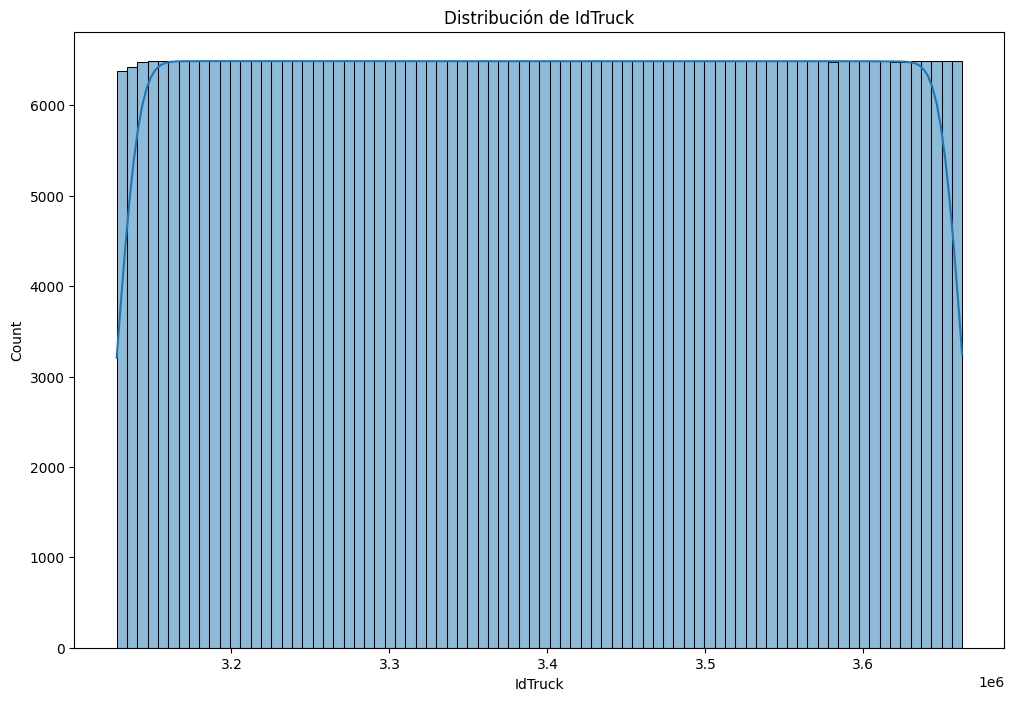

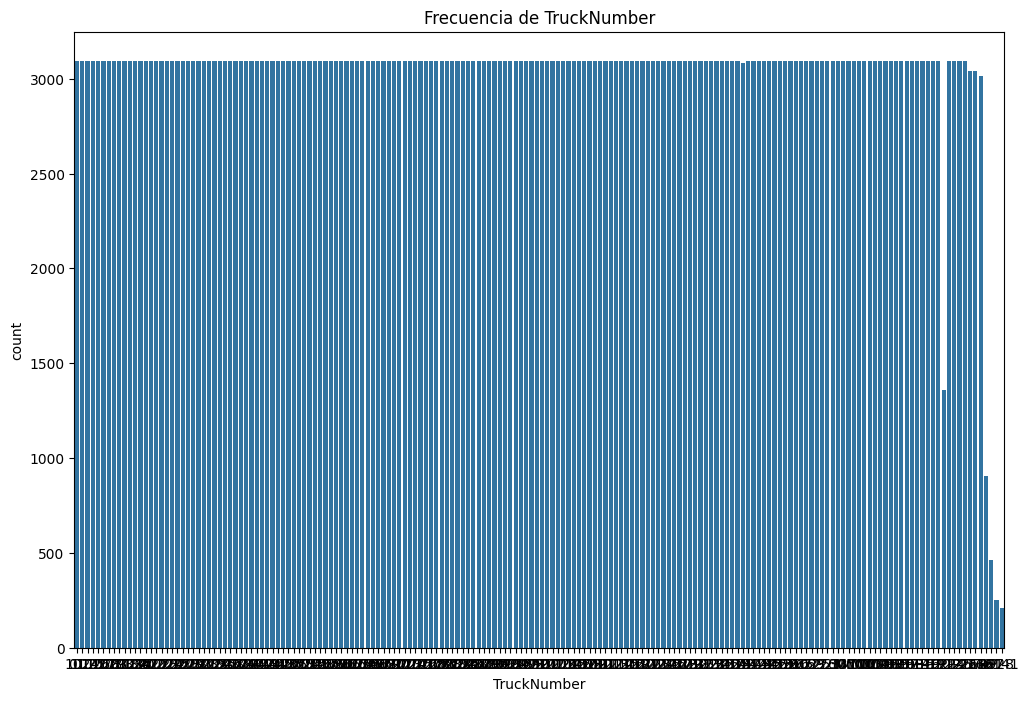

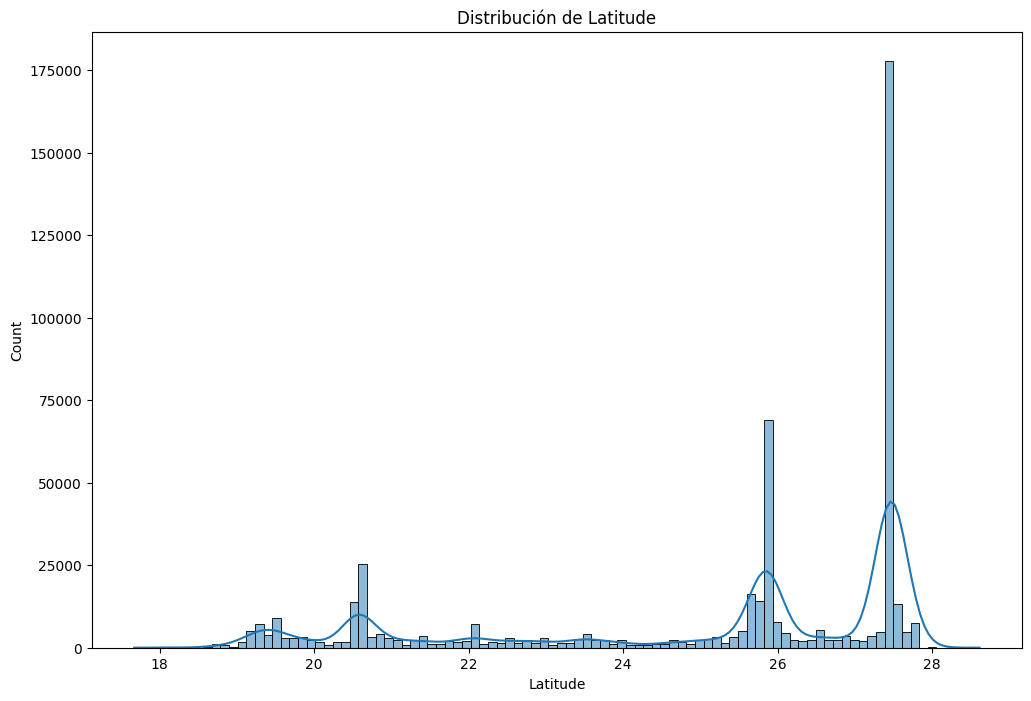

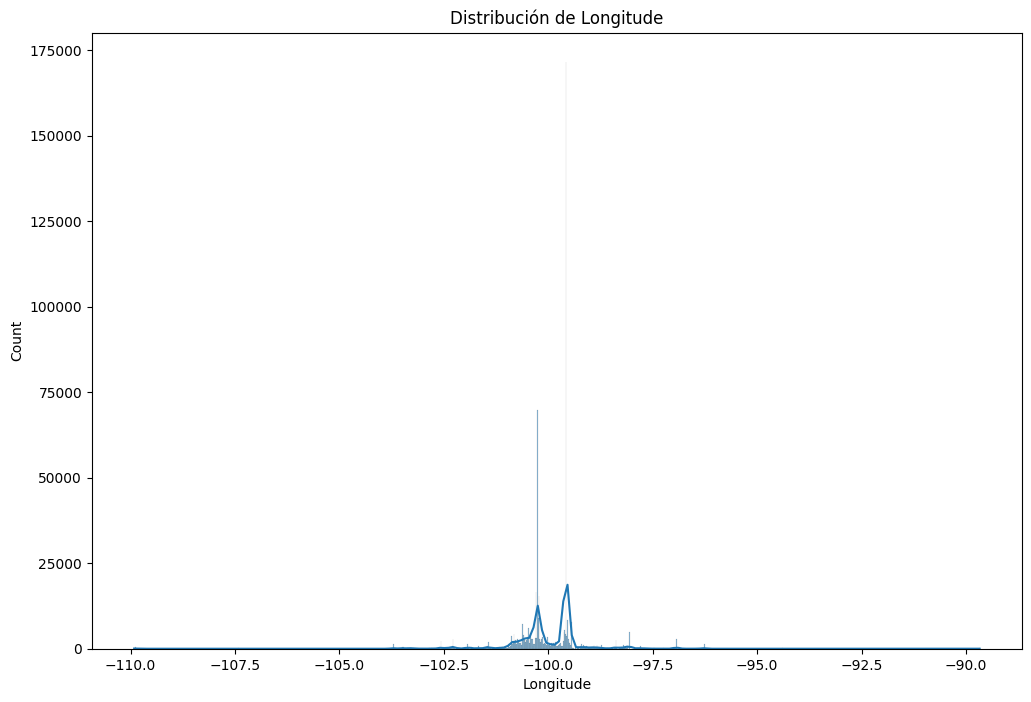

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001B7B79E7880>
Traceback (most recent call last):
  File "c:\Users\arincon\OneDrive - Forza Transportation Services, Inc\Documents\Algoritmo de trazabilidad\.venv\Lib\site-packages\matplotlib\transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))

KeyboardInterrupt: 


In [21]:
# Leer el archivo CSV
df = pd.read_csv('TruckLogs.csv')

# Visualizar histogramas para todas las columnas
for columna in df.columns:
    plt.figure(figsize=(12, 8))
    
    # Verificar si la columna es numérica antes de generar el histograma
    if pd.api.types.is_numeric_dtype(df[columna]):
        sns.histplot(df[columna], kde=True)
        plt.title(f'Distribución de {columna}')
    else:
        # Para columnas no numéricas, puedes usar un gráfico de barras para la frecuencia de cada categoría
        sns.countplot(x=columna, data=df)
        plt.title(f'Frecuencia de {columna}')
    
    plt.show()

In [4]:
import folium
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('TruckLogs.csv')

# Calcular la mediana de latitud y longitud
mediana_latitud = df['Latitude'].median()
mediana_longitud = df['Longitude'].median()

# Crear un mapa centrado en la mediana de latitud y longitud
mapa = folium.Map(location=[mediana_latitud, mediana_longitud], zoom_start=15)

# Agregar un marcador en la ubicación mediana
folium.Marker([mediana_latitud, mediana_longitud], popup='Ubicación más transitada').add_to(mapa)

# Mostrar el mapa
display(mapa)


C:\Users\arincon\AppData\Local\Temp\ipykernel_11284\1208945997.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TruckLogs.csv')
